In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score

# Data Preprocessing

In [110]:
# Data set was already split into training and testing sets

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [111]:
# Shape of training data 
df_train.shape

(7613, 5)

In [112]:
# Shape of testing data 
df_test.shape

(3263, 4)

In [113]:
# Describing training dataset
df_train.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [114]:
# Describing testing dataset
df_test.describe()

,id
count,3263.000000
mean,5427.152927
std,3146.427221
min,0.000000
25%,2683.000000
50%,5500.000000
75%,8176.000000
max,10875.000000


In [115]:
# Top 5 of training set
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [116]:
#  Function to calculate total of missing values in dataset
def missing_values(df):
    print("Number of records with missing location:",df.location.isna().sum())
    print("Number of records with missing keywords:",df.keyword.isna().sum())
    

In [117]:
# Checking missing values of training set
missing_values(df_train)

Number of records with missing location: 2533
Number of records with missing keywords: 61


In [118]:
# Missing values of testing set
missing_values(df_test)

Number of records with missing location: 1105
Number of records with missing keywords: 26


In [119]:
# Check for keywords count
keywords = df_train['keyword'].value_counts()
print(keywords.head())

fatalities    45
deluge        42
armageddon    42
sinking       41
damage        41
Name: keyword, dtype: int64


In [120]:
# Check location counts
locations = df_train['location'].value_counts()
print(locations.head())

USA              104
New York          71
United States     50
London            45
Canada            29
Name: location, dtype: int64


<AxesSubplot: xlabel='location'>

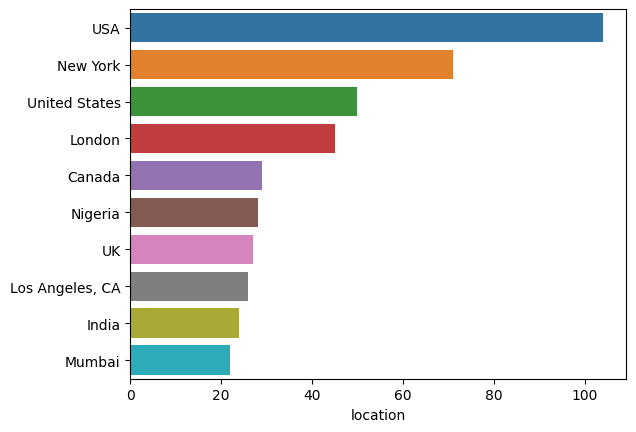

In [121]:
#Create barchart for locations in train set using seaborn
sns.barplot(y=df_train['location'].value_counts()[:10].index,x=df_train['location'].value_counts()[:10],
            orient='h')

<AxesSubplot: xlabel='location'>

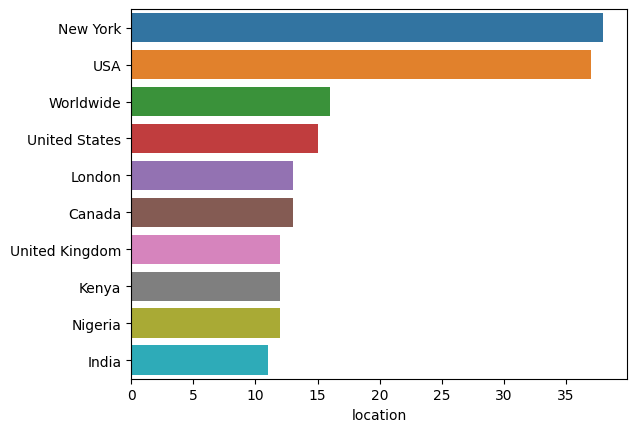

In [122]:
#Create barchart for locations in test set using seaborn
sns.barplot(y=df_test['location'].value_counts()[:10].index,x=df_test['location'].value_counts()[:10],
            orient='h')

Group By

In [123]:
# Groupby 
df_train.groupby('target').count()

,id,keyword,location,text
target,,,,
0,4342,4323,2884,4342
1,3271,3229,2196,3271


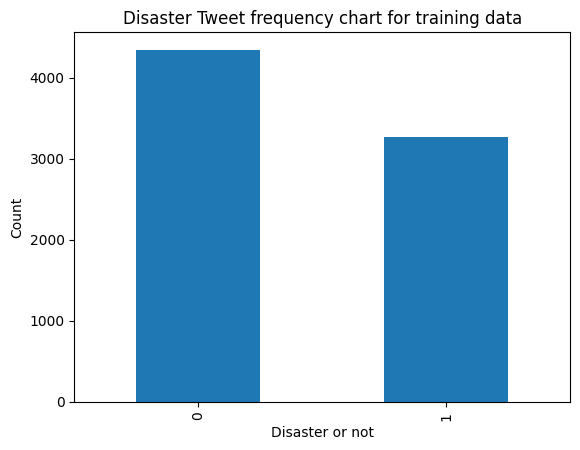

In [124]:
# Group the tweets by disaster or not for the training data
grouped = df_train.groupby(['target'])['text'].count()

# plot the same as bar chart
grouped.plot(kind='bar')
plt.title('Disaster Tweet frequency chart for training data')
plt.xlabel('Disaster or not')
plt.ylabel('Count')
plt.show()

Tweet Lengths

In [125]:
# Calculate tweet lengths
df_train['length'] = df_train['text'].apply(lambda x : len(x))
df_train.head() # Check new columns

,id,keyword,location,text,target,length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


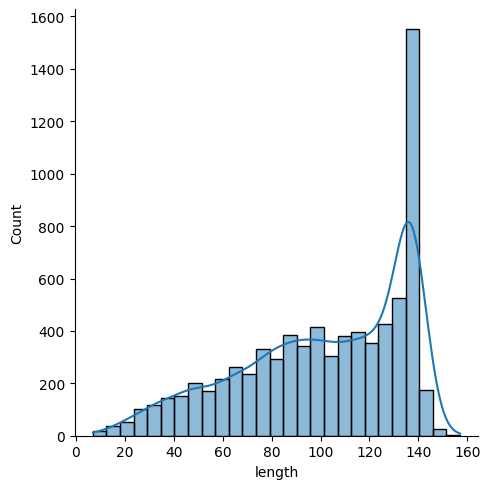

In [126]:
# Visualization of Tweet Lengths in training data
# Code source: https://seaborn.pydata.org/generated/seaborn.displot.html

sns.displot(data=df_train['length'], kde=True)

In [127]:
# Dropping unnecessary columns
df_train = df_train.drop(columns=['keyword', 'location', 'length'])

# Text Vectorization

In [128]:
# Import string
import string

# Import nltk (Natural Language Toolkit)
import nltk
nltk.download('stopwords')

# NLTK packages
from nltk.corpus import stopwords
from nltk import PorterStemmer as Stemmer

# Code source for text preprocessing: 
# https://www.analyticsvidhya.com/blog/2021/06/text-preprocessing-in-nlp-with-python-codes/

def preprocess(text):
    # lowercase 
    text = text.lower()
    
    # Remove punctuation
    text = ''.join([t for t in text if t not in string.punctuation])
    
    # Removing stopwords since they do not add value to this analysis
    # Code source: https://pythonprogramming.net/stop-words-nltk-tutorial/
    text = [t for t in text.split() if t not in stopwords.words('english')]
    
    # Stemming is used to reducing words to their root 
    # Code source: https://www.kaggle.com/code/sudalairajkumar/getting-started-with-text-preprocessing
    stemmer = Stemmer()
    text = [stemmer.stem(t) for t in text]
    
    # return text 
    return text

# The function above is used to normalize and tokenize 
# texts that were found in the 'Text' column. 
# we cleaned the 'Text' column as much as we could by 
# using the NLTK (Natural Language Toolkit) library 
# that we found in their documentation (https://www.nltk.org/). 
# By cleaning this up, we are able reduce 
# the size of the vocab when we input into our machine learning model. 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\khuyn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [129]:
# Test with dataset, the first 20 rows
df_train['text'][:20].apply(preprocess)

0     [deed, reason, earthquak, may, allah, forgiv, us]
1          [forest, fire, near, la, rong, sask, canada]
2     [resid, ask, shelter, place, notifi, offic, ev...
3     [13000, peopl, receiv, wildfir, evacu, order, ...
4     [got, sent, photo, rubi, alaska, smoke, wildfi...
5     [rockyfir, updat, california, hwi, 20, close, ...
6     [flood, disast, heavi, rain, caus, flash, floo...
7                      [im, top, hill, see, fire, wood]
8     [there, emerg, evacu, happen, build, across, s...
9                     [im, afraid, tornado, come, area]
10                 [three, peopl, die, heat, wave, far]
11    [haha, south, tampa, get, flood, hah, wait, se...
12    [rain, flood, florida, tampabay, tampa, 18, 19...
13                  [flood, bago, myanmar, arriv, bago]
14    [damag, school, bu, 80, multi, car, crash, break]
15                                          [what, man]
16                                        [love, fruit]
17                                       [summer

In [130]:
# Test with dataset, the first 20 rows
df_test['text'][:20].apply(preprocess)

0                         [happen, terribl, car, crash]
1     [heard, earthquak, differ, citi, stay, safe, e...
2     [forest, fire, spot, pond, gees, flee, across,...
3                   [apocalyps, light, spokan, wildfir]
4          [typhoon, soudelor, kill, 28, china, taiwan]
5                                [shakingit, earthquak]
6     [theyd, probabl, still, show, life, arsen, yes...
7                                                 [hey]
8                                           [nice, hat]
9                                                [fuck]
10                                   [dont, like, cold]
11                                   [nooooooooo, dont]
12                                         [dont, tell]
13                                                   []
14                                             [awesom]
15    [birmingham, wholesal, market, ablaz, bbc, new...
16           [sunkxssedharri, wear, short, race, ablaz]
17    [previouslyondoyintv, toke, makinwaûª, ma

In [131]:
# Fit transform
TFID = TfidfVectorizer(analyzer=preprocess)
fit = TFID.fit_transform(df_train['text'])
fits = TFID.fit_transform(df_test['text'])

In [132]:
# Checking values
content = df_train.iloc[50]['text'] # Randomly chose 50th index
print(content) # Print message

Deputies: Man shot before Brighton home set ablaze http://t.co/gWNRhMSO8k


In [133]:
# Assigning texts to vectors

# Code source:
# https://github.com/scikit-learn/scikit-learn/blob/8c9c1f27b/sklearn/feature_extraction/text.py#L1470

# Code source 2: 
# https://www.kaggle.com/code/jeffysonar/spam-filter-using-naive-bayes-classifier/notebook

# Inputing "content" into transform function and adding to an array
tfid = TFID.transform(['text']).toarray()[0]

print('index\tidf\ttfidf\tterm') # Print in this order

# Loop function to assign different values to its term. 
for i in range(len(tfid)):
    if tfid[i] != 0:
        print(i, format(TFID
                        .idf_[i], '.5f'), format(tfid[i], 
                                                 '.5f'), 
                        TFID.get_feature_names_out()[i],sep='\t')

index	idf	tfidf	term
9747	6.69281	1.00000	text


# Logistic Regression

In [134]:
# Check size of text column
training_texts = df_train['text']

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(training_texts)
y_train = df_train['target']
X_test = vectorizer.transform(df_test['text'])

print(X_train.size)
print(y_train.size)

111497
7613


In [135]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [136]:
# Logistic regression model for predicting diaster in tweets 
log = LogisticRegression()

# Train the model on the training data
log.fit(X_train, y_train)

# Make predictions on the test data
log_pred = log.predict(X_test)
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       874
           1       0.83      0.67      0.74       649

    accuracy                           0.80      1523
   macro avg       0.81      0.78      0.79      1523
weighted avg       0.80      0.80      0.80      1523



# Multinomial NB

In [137]:
mnb = MultinomialNB()

# Fitting the model
mnb.fit(X_train, y_train)

# Evaluate the Multinomial NB model on the testing set
nb_pred = mnb.predict(X_test)
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84       874
           1       0.86      0.63      0.73       649

    accuracy                           0.80      1523
   macro avg       0.82      0.78      0.78      1523
weighted avg       0.81      0.80      0.79      1523



# SVM

In [138]:
from sklearn.svm import SVC
from sklearn.metrics import silhouette_score, accuracy_score, classification_report

# Building and training SVM model
svm = SVC()

# Fitting the model
svm.fit(X_train, y_train)

# Evaluate the SVM model on the testing set
svm_pred = svm.predict(X_test)
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       874
           1       0.87      0.65      0.75       649

    accuracy                           0.81      1523
   macro avg       0.83      0.79      0.80      1523
weighted avg       0.82      0.81      0.81      1523



# Random Forest

In [139]:
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the classifier
rf_pred = rf.predict(X_test)
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       874
           1       0.86      0.57      0.69       649

    accuracy                           0.78      1523
   macro avg       0.80      0.75      0.76      1523
weighted avg       0.80      0.78      0.77      1523



# Neural Networks

In [140]:
from sklearn.preprocessing import StandardScaler

# Standardize the  dataset
scaler = StandardScaler(with_mean=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [160]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Embedding, Flatten, Dropout
from keras.models import Sequential


In [173]:
# Tokenizer documentation: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer
# pad_sequences documentation: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences
# Sequential model documentation: https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
# Embedding layer documentation: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding
# Dense layer documentation: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
# Flatten layer documentation: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten
# Dropout layer documentation: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout

# Preprocess the text data
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(df_train['text'])
tokenizer.fit_on_texts(df_test['text'])
train_sequences = tokenizer.texts_to_sequences(df_train['text'])
train_padded = pad_sequences(train_sequences, padding='post', truncating='post')
test_sequences = tokenizer.texts_to_sequences(df_test['text'])
test_padded = pad_sequences(test_sequences, padding='post', truncating='post')


In [220]:
# create model
model = Sequential()
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Build model
model.build(input_shape=(None, 21637)) 

 # Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_97 (Dense)            (None, 256)               5539328   
                                                                 
 dense_98 (Dense)            (None, 128)               32896     
                                                                 
 dense_99 (Dense)            (None, 1)                 129       
                                                                 
Total params: 5,572,353
Trainable params: 5,572,353
Non-trainable params: 0
_________________________________________________________________


In [222]:
# Converting to  numpy arras to be compatible with keras
X_test = np.array(X_test)
y_test = np.array(y_test)

# Evaluate the model
accuracy = model.evaluate(X_test, y_test)
print('Test loss:', accuracy[0])
print('Test accuracy:', accuracy[1])

48/48 [==============================] - 0s 9ms/step - loss: 0.8140 - accuracy: 0.4347
Test loss: 0.8139750361442566
Test accuracy: 0.4346684217453003
